In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import wbgapi as wb
import seaborn as sns


In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [3]:
wb.series.info(q='food production index')

id,value
AG.PRD.FOOD.XD,Food production index (2014-2016 = 100)
,1 elements


In [4]:
df = wb.data.DataFrame('AG.PRD.CREL.MT','USA', time =range(1960,2023), skipBlanks=True, columns = 'series').reset_index()
df

,time,AG.PRD.CREL.MT
0,YR1961,1.636200e+08
1,YR1962,1.624558e+08
2,YR1963,1.748125e+08
3,YR1964,1.609371e+08
4,YR1965,1.836026e+08
...,...,...
56,YR2017,4.402718e+08
57,YR2018,4.397079e+08
58,YR2019,4.208699e+08
59,YR2020,4.332568e+08


In [5]:
print(df['time'].dtype)

object


In [6]:
df
df['time'] = df['time'].str.slice(start=2).astype(int)


In [7]:
df

,time,AG.PRD.CREL.MT
0,1961,1.636200e+08
1,1962,1.624558e+08
2,1963,1.748125e+08
3,1964,1.609371e+08
4,1965,1.836026e+08
...,...,...
56,2017,4.402718e+08
57,2018,4.397079e+08
58,2019,4.208699e+08
59,2020,4.332568e+08


In [8]:
df['time'].dtype
df['time']=pd.to_datetime(df['time'], format='%Y')
df['time'].dtype

dtype('<M8[ns]')

In [9]:
df.columns=('Year', 'Cer_prod')
df

,Year,Cer_prod
0,1961-01-01,1.636200e+08
1,1962-01-01,1.624558e+08
2,1963-01-01,1.748125e+08
3,1964-01-01,1.609371e+08
4,1965-01-01,1.836026e+08
...,...,...
56,2017-01-01,4.402718e+08
57,2018-01-01,4.397079e+08
58,2019-01-01,4.208699e+08
59,2020-01-01,4.332568e+08


Text(0, 0.5, 'cereal production')

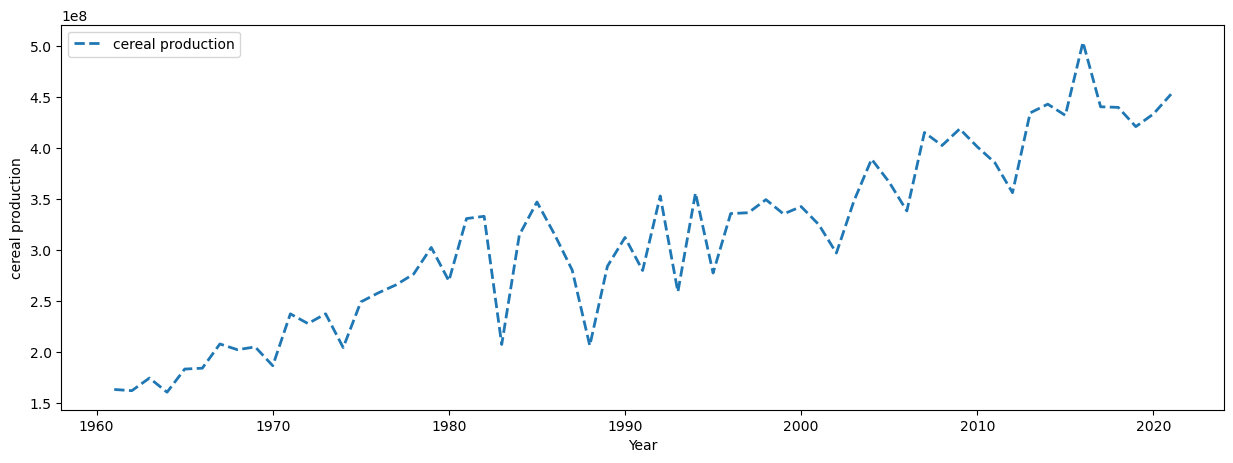

In [10]:
plt.subplots(figsize=(15,5))
plt.plot(df['Year'], df['Cer_prod'], label = 'cereal production', linestyle='--', linewidth=2,)
plt.title = 'Annual Cereal Production'
plt.legend()
plt.xlabel('Year')
plt.ylabel('cereal production')

In [11]:
df.columns = ('ds', 'y')


In [12]:
m = Prophet(yearly_seasonality=6, seasonality_mode = 'multiplicative')
m.fit(df)


15:13:09 - cmdstanpy - INFO - Chain [1] start processing
15:13:09 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods= 12*5, freq = 'MS') #predicting production for 5 years, with MS being month start
forecast = m.predict(future) #if no future is indicated, it would simply tell us the predicted values and not forecasted values  

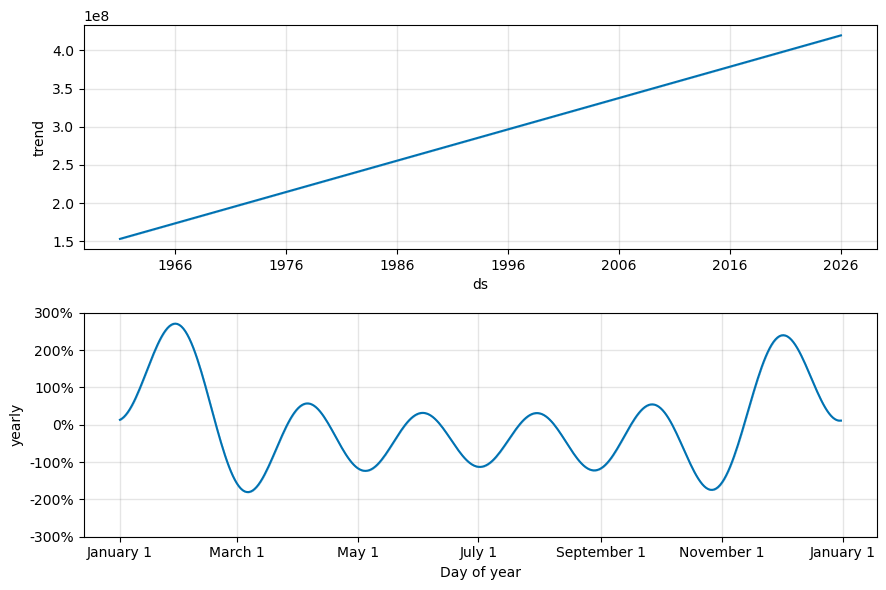

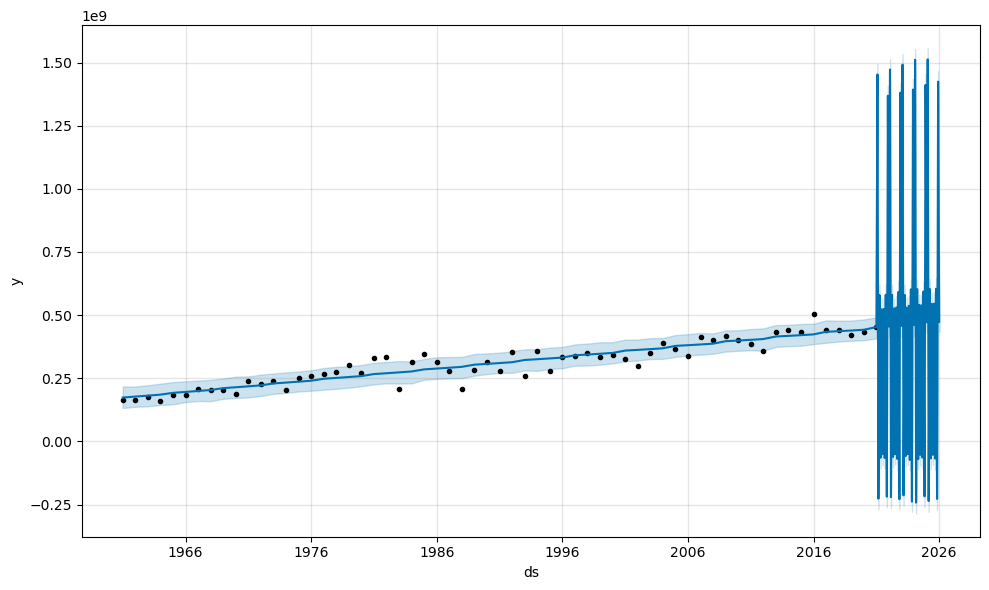

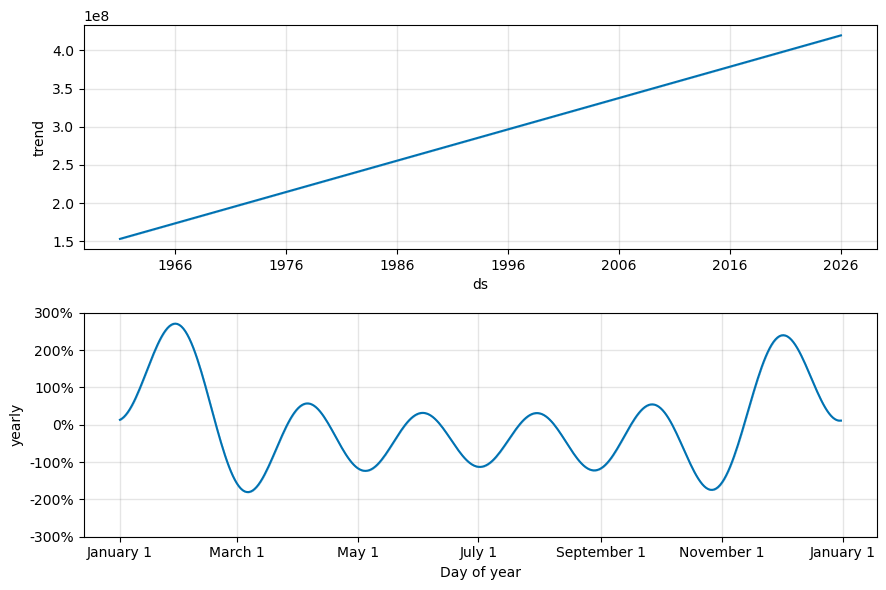

In [14]:
fig = m.plot(forecast)
m.plot_components(forecast)
#from the graph below, it is clear that cereal production in the US will increase, with low productions happening during the summer and production increasing during winter all through fall

In [15]:
forecast.head(3).T

,0,1,2
ds,1961-01-01 00:00:00,1962-01-01 00:00:00,1963-01-01 00:00:00
trend,153153898.524261,157253139.996977,161352381.469693
yhat_lower,132185332.216024,136952217.475592,138743842.853412
yhat_upper,217227603.195148,217319383.444422,222432260.381075
trend_lower,153153898.524261,157253139.996977,161352381.469693
trend_upper,153153898.524261,157253139.996977,161352381.469693
multiplicative_terms,0.133147,0.127319,0.122343
multiplicative_terms_lower,0.133147,0.127319,0.122343
multiplicative_terms_upper,0.133147,0.127319,0.122343
yearly,0.133147,0.127319,0.122343


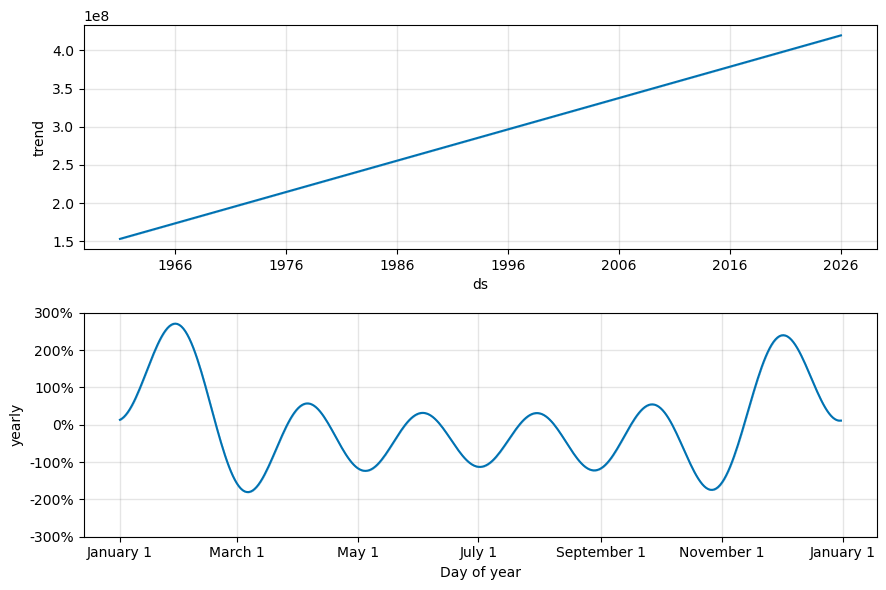

In [16]:
add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()
fig2 = m.plot_components(forecast)

In [17]:
from prophet.diagnostics import cross_validation

In [18]:
df_cv = cross_validation(m,horizon = '3650 days', period = '365 days', initial = '730 days')

  0%|          | 0/49 [00:00<?, ?it/s]

15:13:14 - cmdstanpy - INFO - Chain [1] start processing
15:13:49 - cmdstanpy - INFO - Chain [1] done processing
15:13:50 - cmdstanpy - INFO - Chain [1] start processing
15:13:51 - cmdstanpy - INFO - Chain [1] done processing
15:13:51 - cmdstanpy - INFO - Chain [1] start processing
15:13:52 - cmdstanpy - INFO - Chain [1] done processing
15:13:52 - cmdstanpy - INFO - Chain [1] start processing
15:13:53 - cmdstanpy - INFO - Chain [1] done processing
15:13:53 - cmdstanpy - INFO - Chain [1] start processing
15:13:53 - cmdstanpy - INFO - Chain [1] done processing
15:13:54 - cmdstanpy - INFO - Chain [1] start processing
15:13:55 - cmdstanpy - INFO - Chain [1] done processing
15:13:55 - cmdstanpy - INFO - Chain [1] start processing
15:13:56 - cmdstanpy - INFO - Chain [1] done processing
15:13:57 - cmdstanpy - INFO - Chain [1] start processing
15:13:57 - cmdstanpy - INFO - Chain [1] done processing
15:13:58 - cmdstanpy - INFO - Chain [1] start processing
15:13:58 - cmdstanpy - INFO - Chain [1]

In [19]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1964-01-01,1.874652e+08,1.798721e+08,1.929968e+08,160937079.0,1963-01-16
1,1965-01-01,1.879349e+08,1.649486e+08,2.066434e+08,183602617.0,1963-01-16
2,1966-01-01,2.006205e+08,1.514518e+08,2.416263e+08,184444880.0,1963-01-16
3,1967-01-01,2.136034e+08,1.425098e+08,2.792260e+08,208158055.0,1963-01-16
4,1968-01-01,2.268796e+08,1.224688e+08,3.234231e+08,202538423.0,1963-01-16


In [20]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
485,2017-01-01,4.256078e+08,3.877856e+08,4.663194e+08,4.402718e+08,2011-01-04
486,2018-01-01,4.285056e+08,3.891295e+08,4.724647e+08,4.397079e+08,2011-01-04
487,2019-01-01,4.316622e+08,3.894985e+08,4.716363e+08,4.208699e+08,2011-01-04
488,2020-01-01,4.350871e+08,3.926406e+08,4.755062e+08,4.332568e+08,2011-01-04
489,2021-01-01,4.433947e+08,4.012168e+08,4.832259e+08,4.526284e+08,2011-01-04


In [21]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [22]:
df_p = performance_metrics(df_cv)

In [23]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,362 days,1.588182e+15,3.985200e+07,2.992011e+07,0.113113,0.071622,0.109762,0.551020
1,716 days,1.655036e+15,4.068213e+07,3.052436e+07,0.115691,0.080272,0.114181,0.540816
2,717 days,1.618119e+15,4.022584e+07,3.041053e+07,0.114922,0.071622,0.112303,0.515306
3,718 days,1.612165e+15,4.015177e+07,3.022276e+07,0.113985,0.071622,0.111371,0.525510
4,719 days,1.616860e+15,4.021020e+07,3.032141e+07,0.113993,0.071622,0.111549,0.515306
